In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [43]:
def data_grouping(df:pd.DataFrame(), grouping_keys:list, values_describe:list):
    """Groups a dataframe according to set keys and applies a descriptive 
    function to specified columns"""

    try:
        describe_params = ["count", "sum", "mean", "std", "min", 
                            lambda x: x.quantile(0.25), "median", 
                            lambda x: x.quantile(0.55), "max"]
        dict_params = {}
        for i in values_describe:
            dict_params[i] = describe_params
        
        df_complete = df.copy()
        df_res = df_complete.groupby(grouping_keys).agg(dict_params)
        return df_res
    except Exception as e:
        print(e)

In [44]:
df_cards = pd.read_parquet("./../data/processed/data_cards.parquet", engine="fastparquet")
df_users = pd.read_parquet("./../data/processed/data_users.parquet", engine="fastparquet")
df_transactions = pd.read_parquet("./../data/processed/data_transactions.parquet", engine="fastparquet").tail(2000000)
df_complete = pd.read_parquet("./../data/processed/data_complete.parquet", engine="fastparquet")

In [ ]:
df_cards

,ID_USER,NUM_CARD,CARD_BRAND,CARD_TYPE,ID_CARD,EXPIRES,CVV,HAS_CHIP,CARDS_ISSUED,CREDIT_LIMIT,ACCT_OPEN_DATE,YEAR_PIN_LAST_CHANGED,CARD_ON_DARK_WEB,ID_CARDS_USER
index,,,,,,,,,,,,,,
0,0,0,Visa,Debit,4344676511950444,12/2022,623,True,2,24295.0,09/2002,2008,True,0 - 0
1,0,1,Visa,Debit,4956965974959986,12/2020,393,True,2,21968.0,04/2014,2014,True,0 - 1
2,0,2,Visa,Debit,4582313478255491,02/2024,719,True,2,46414.0,07/2003,2004,True,0 - 2
3,0,3,Visa,Credit,4879494103069057,08/2024,693,False,1,12400.0,01/2003,2012,True,0 - 3
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,True,1,28.0,09/2008,2009,True,0 - 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,True,1,6900.0,11/2000,2013,True,1997 - 1
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,True,2,5700.0,04/2012,2012,True,1997 - 2
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,False,2,9200.0,02/2012,2012,True,1998 - 0


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ID_TRANSACTION    int64         
 1   ID_USER           int64         
 2   ID_CARD           int64         
 3   YEAR              int64         
 4   MONTH             int64         
 5   DAY               int64         
 6   TIME              object        
 7   AMOUNT            float64       
 8   USE_CHIP          object        
 9   MERCHANT_NAME     object        
 10  MERCHANT_CITY     object        
 11  MERCHANT_STATE    object        
 12  ZIP               object        
 13  MCC               object        
 14  ERRORS?           object        
 15  IS_FRAUD?         bool          
 16  TRANSACTION_DATE  datetime64[ns]
 17  ID_CARDS_USER     object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(9)
memory usage: 276.6+ MB


In [ ]:
for i in list(df_transactions.columns):
    print(i)

ID_TRANSACTION
ID_USER
ID_CARD
YEAR
MONTH
DAY
TIME
AMOUNT
USE_CHIP
MERCHANT_NAME
MERCHANT_CITY
MERCHANT_STATE
ZIP
MCC
ERRORS?
IS_FRAUD?
TRANSACTION_DATE
ID_CARDS_USER


# correlaciones

#### Datos de usuarios

De acuerdo a la matriz de correlación, se obtienen las siguientes apreciaciones:
* Están perfectamente correlacionados de manera negativa los atributos de 'Birth Year' y 'Current Age', por lo cual, si se desea entrenar algún modelo con el dataset de usuarios, se debe eliminar alguno de estos dos.
* Se observa que hay correlaciones positivas significativas (Es decir que si una variable aumenta, las otras lo hacen de una manera similar), en los siguientes grupos de variables:
  * La edad y la cantidad de tarjetas de crédito
  * Fico score y la cantidad de tarjetas de crédito
  * Las combinatorias entre las variables de ingresos y débito total
* Se observa que hay correlaciones negativas significativas (Es decir que si una variable aumenta, las otras tienden a disminuir), en los siguientes grupos de variables:
  * La edad y el año de nacimiento. Allí es una correlación negativa perfecta, por lo cual, antes de ingresar estas variables a algún modelo prectivo/prescriptivo, se debe eliminar alguna de estas dos variables
  * El año de nacimiento y la cantidad de tarjetas de crédito 


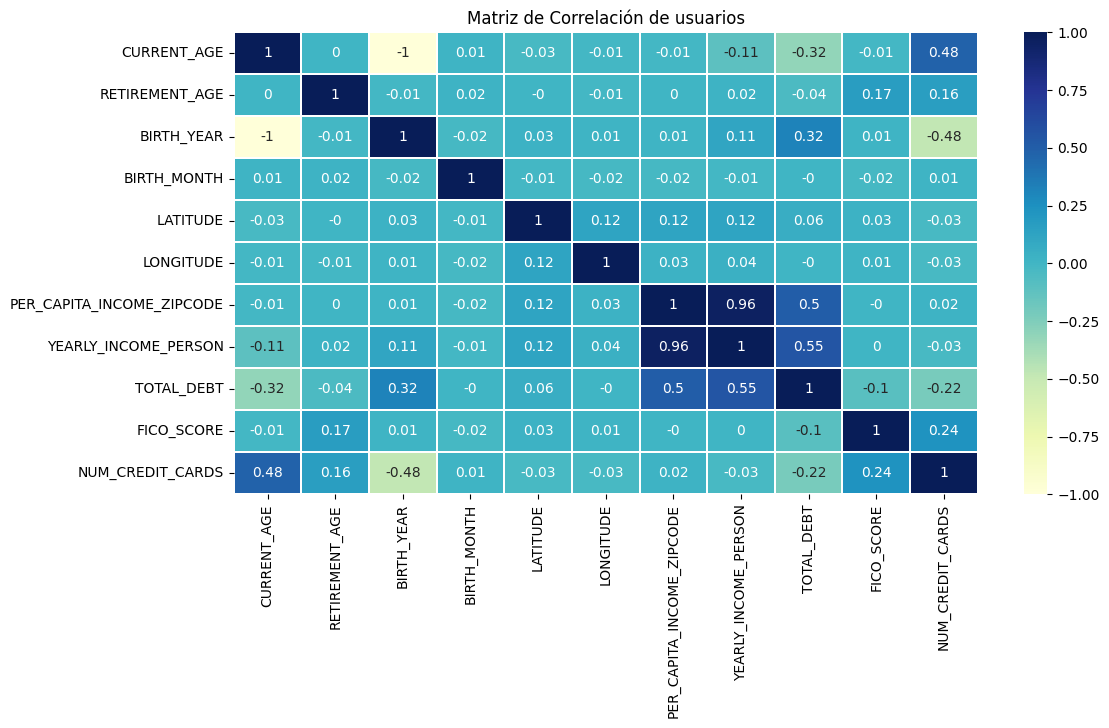

In [ ]:
corr_matrix = df_users.select_dtypes(include=['number']).drop(columns=['ID_USER']).corr().round(2)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.1)
plt.title('Matriz de Correlación de usuarios')
plt.show()


#### Datos de tarjetas

No se encuentran correlaciones entre las variables de esta fuente de datos

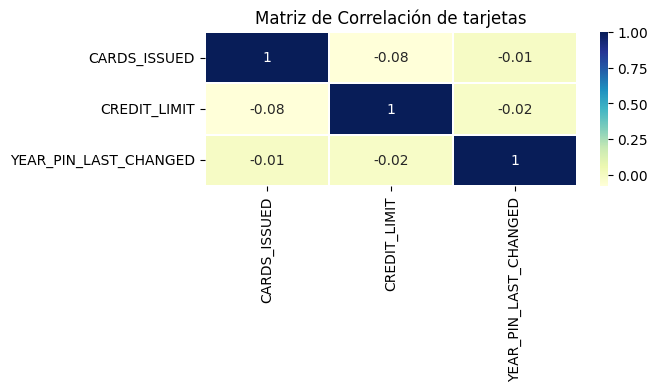

In [ ]:
corr_matrix = df_cards.select_dtypes(include=['number']).drop(columns=['ID_USER', 'ID_CARD']).corr().round(2)
plt.figure(figsize=(6, 2))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.1)
plt.title('Matriz de Correlación de tarjetas')
plt.show()


#### Datos de transacciones

No se encuentran correlaciones entre las variables de esta fuente de datos

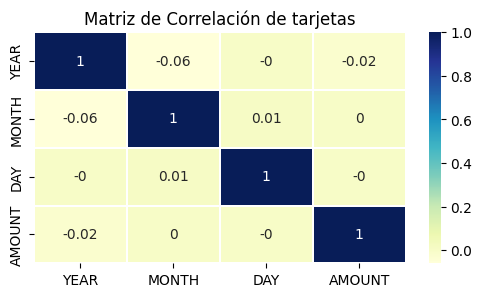

In [ ]:
corr_matrix = df_transactions.select_dtypes(include=['number']).drop(columns=['ID_TRANSACTION', 'ID_USER', 'ID_CARD']).corr().round(2)
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.1)
plt.title('Matriz de Correlación de tarjetas')
plt.show()


# Distribución y los valores atípicos de los datos numéricos 

#### Datos de usuarios

In [ ]:
df_users.describe()

,ID_USER,CURRENT_AGE,RETIREMENT_AGE,BIRTH_YEAR,BIRTH_MONTH,LATITUDE,LONGITUDE,PER_CAPITA_INCOME_ZIPCODE,YEARLY_INCOME_PERSON,TOTAL_DEBT,FICO_SCORE,NUM_CREDIT_CARDS
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,0.000000,1.000000,0.000000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,20581.000000,40744.500000,58251.000000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,26286.000000,52698.500000,89070.500000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,163145.000000,307018.000000,516263.000000,850.000000,9.000000


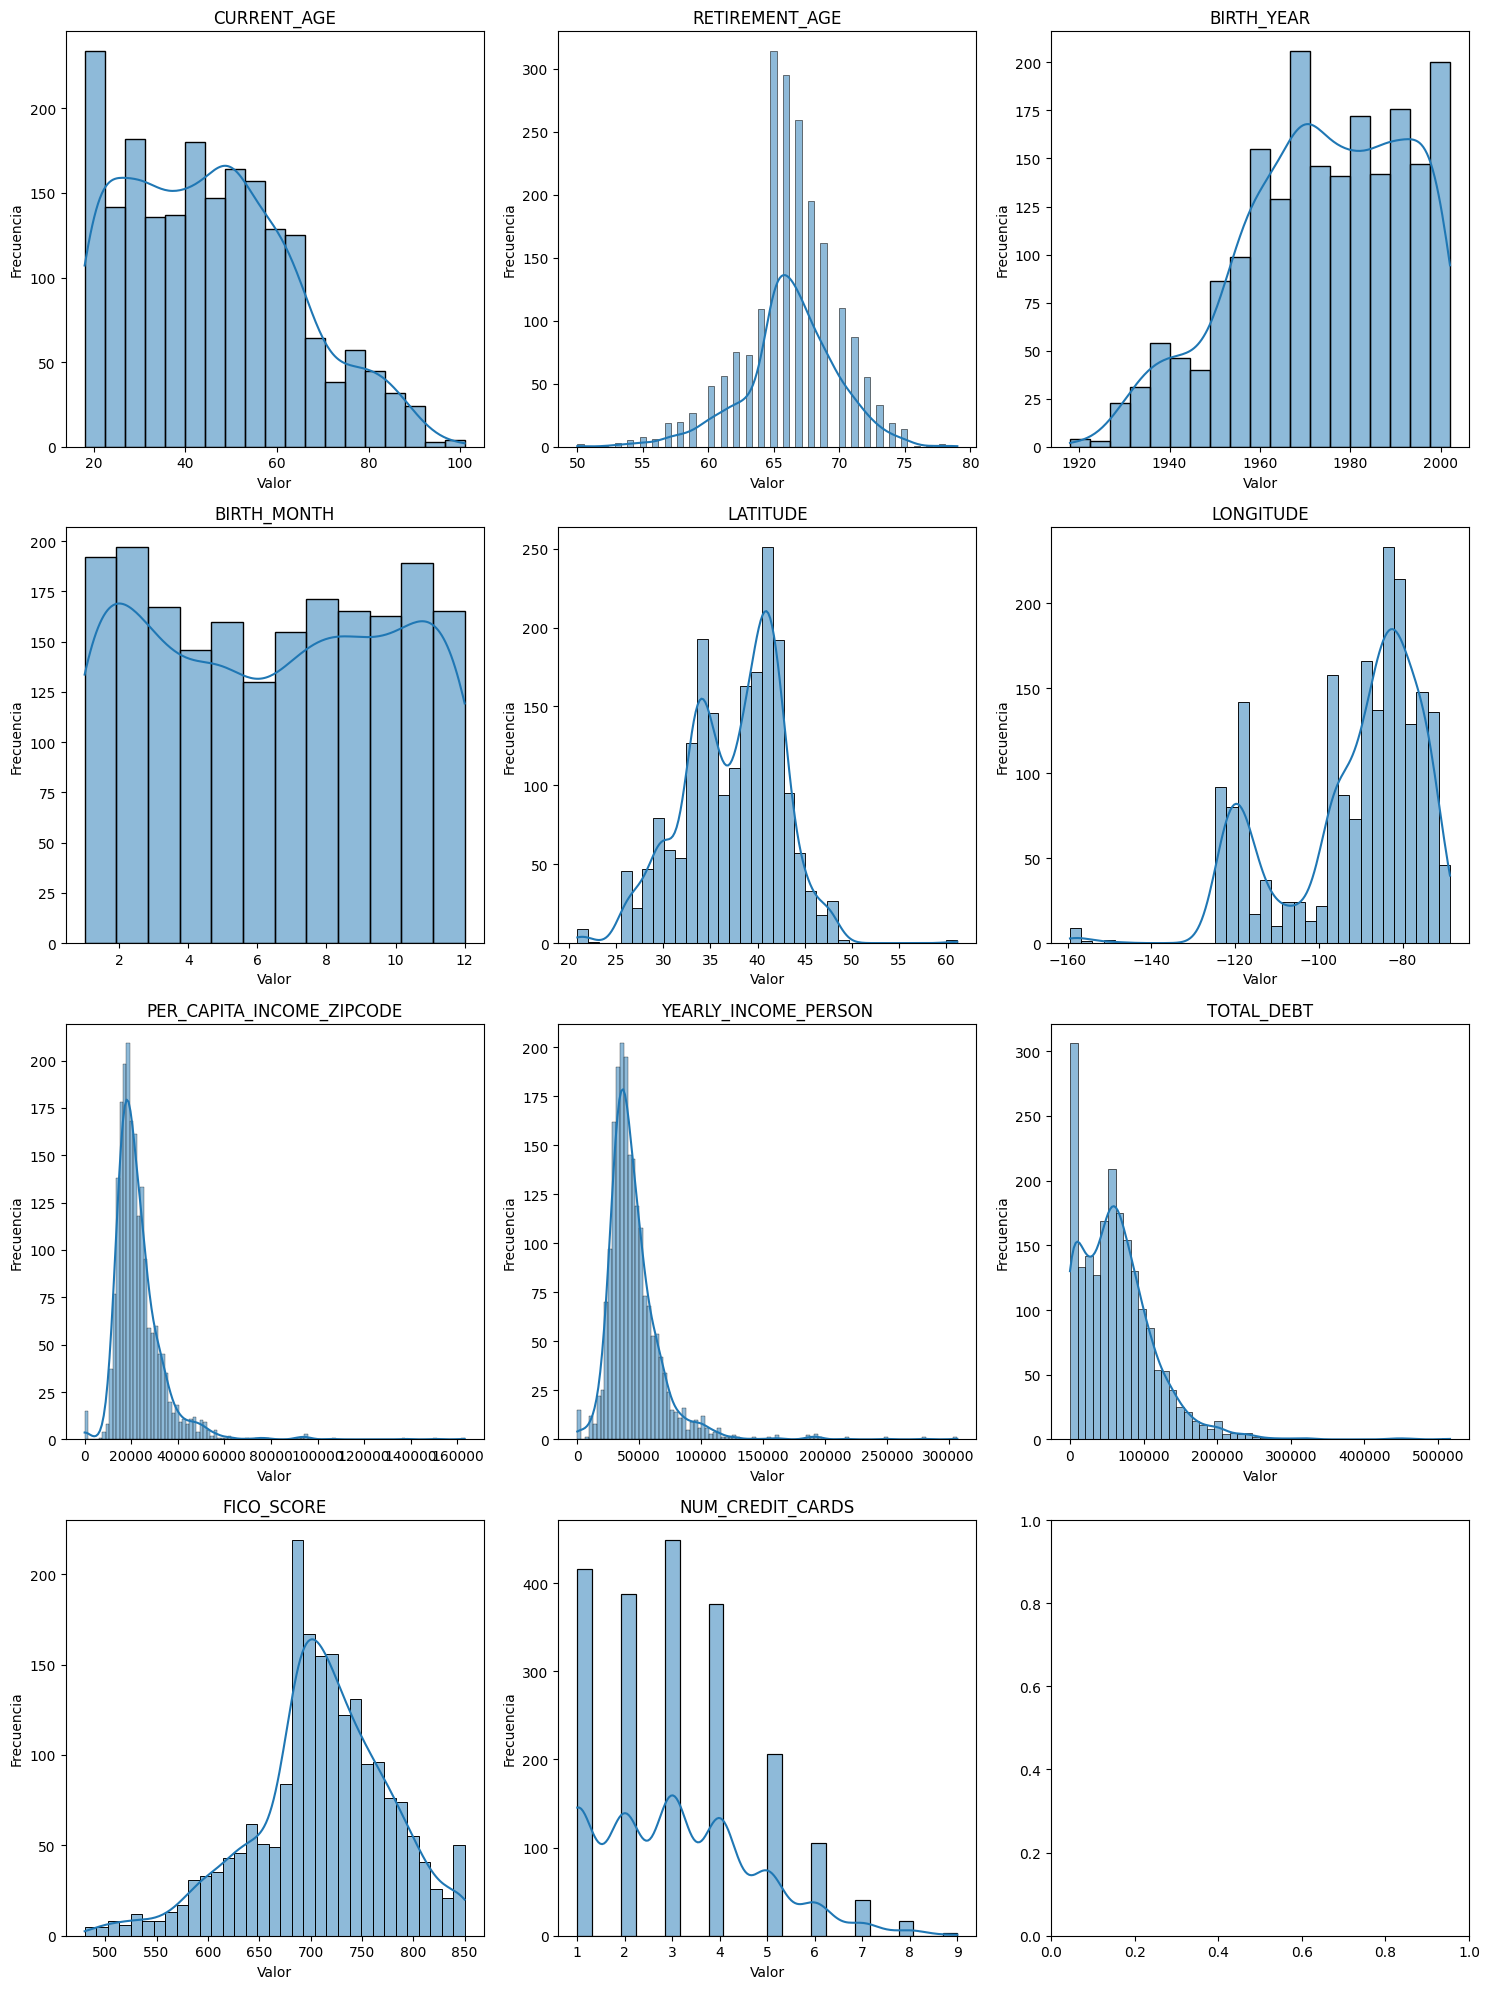

In [ ]:
columnas_numericas = df_users.select_dtypes(include=['number']).drop(columns=['ID_USER']).columns
num_variables = len(columnas_numericas)
num_filas = int(np.ceil(num_variables / 3))
fig, axes = plt.subplots(num_filas, 3, figsize=(15, num_filas*5))
axes = axes.flatten()

for i, columna in enumerate(columnas_numericas):
    sns.histplot(df_users[columna], ax=axes[i], kde=True)
    axes[i].set_title(columna)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

fig.tight_layout()
plt.show()


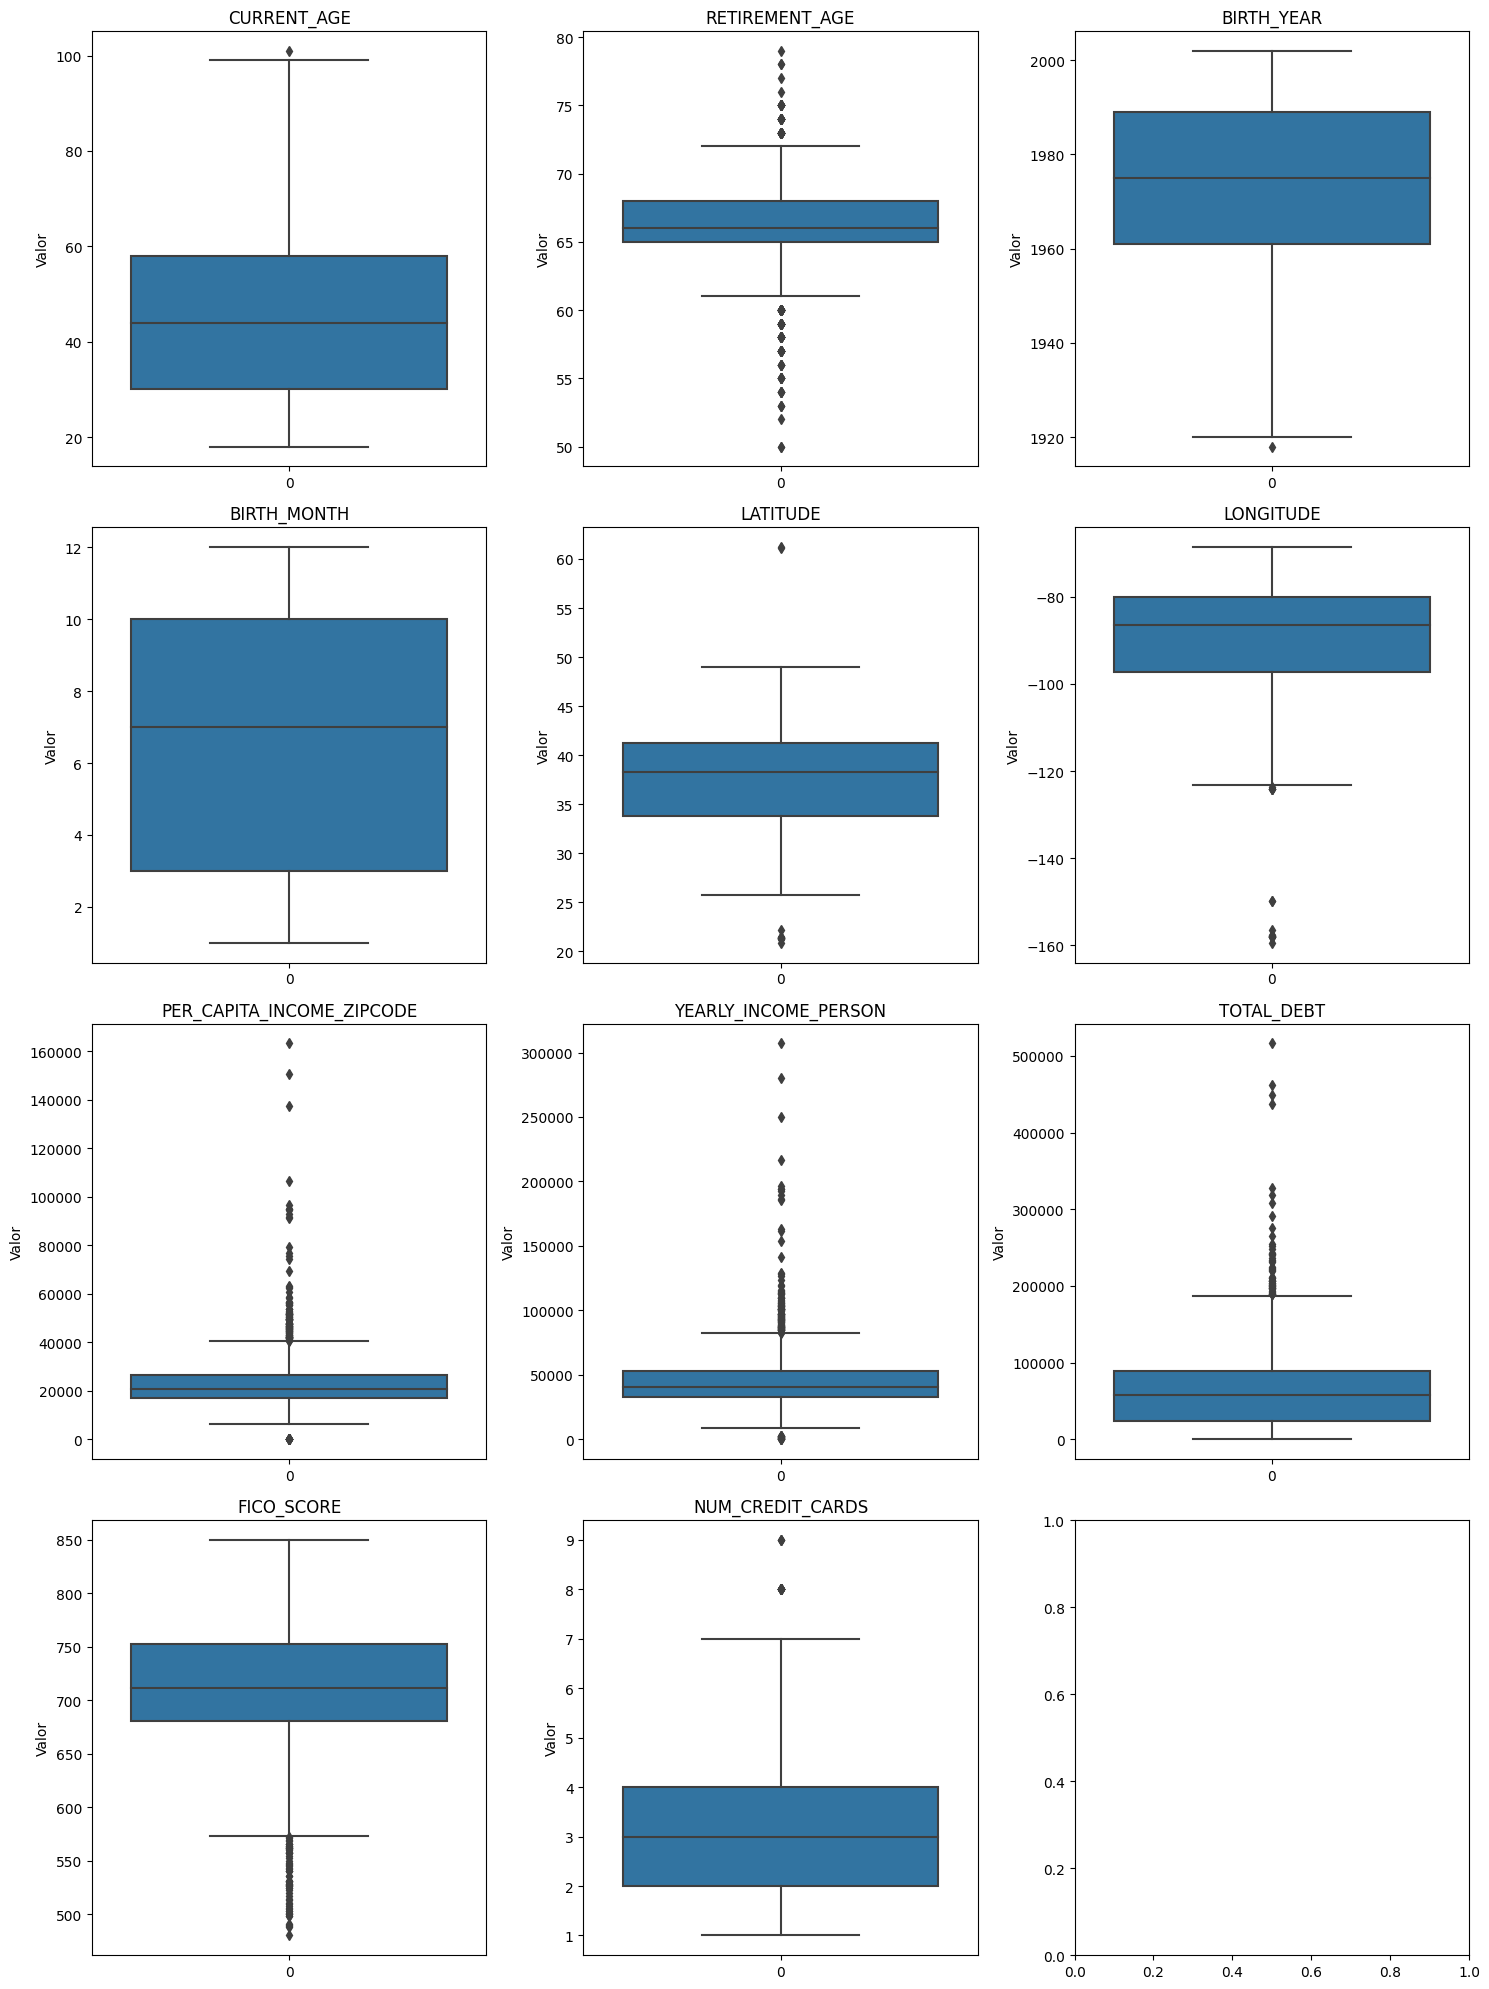

In [ ]:
# Configurar la visualización
num_variables = len(columnas_numericas)
num_filas = int(np.ceil(num_variables / 3))  # Ajusta el número de filas según tu preferencia

# Crear una subtrama para cada variable numérica
fig, axes = plt.subplots(num_filas, 3, figsize=(15, num_filas*5))
axes = axes.flatten()

# Iterar sobre las variables y trazar el gráfico de cajas y bigotes
for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=df_users[columna], ax=axes[i])
    axes[i].set_title(columna)
    axes[i].set_ylabel('Valor')

# Ajustar el espaciado entre las subtramas y mostrar el gráfico
fig.tight_layout()
plt.show()

#### Datos de tarjetas

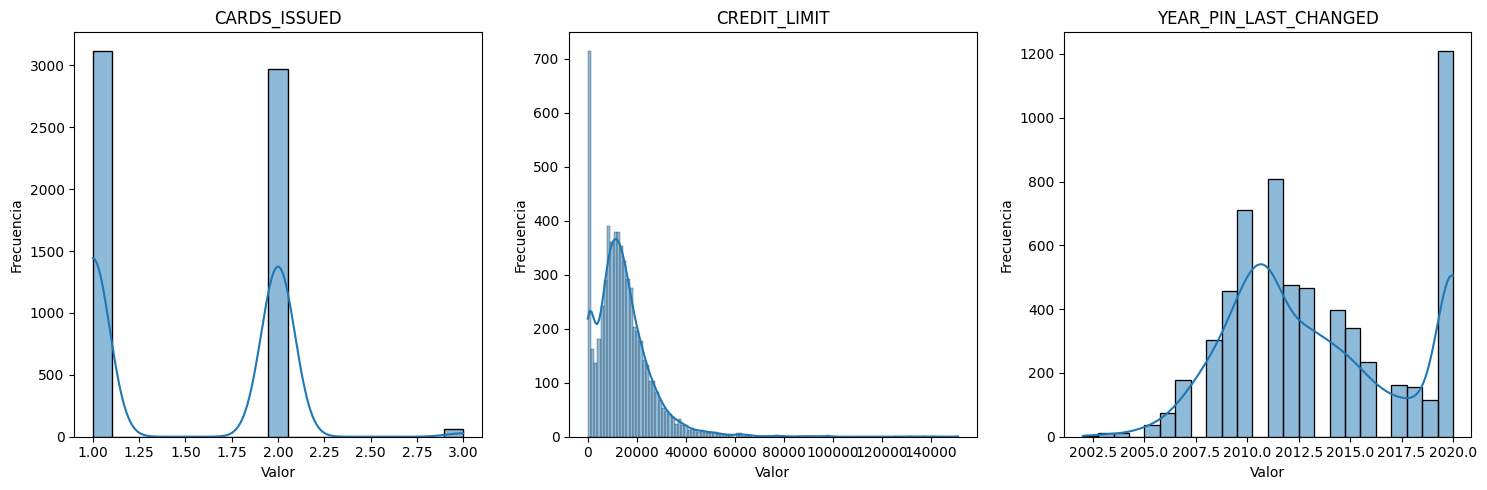

In [ ]:
columnas_numericas = df_cards.select_dtypes(include=['number']).drop(columns=['ID_USER', 'ID_CARD']).columns
num_variables = len(columnas_numericas)
num_filas = int(np.ceil(num_variables / 3))
fig, axes = plt.subplots(num_filas, 3, figsize=(15, num_filas*5))
axes = axes.flatten()

for i, columna in enumerate(columnas_numericas):
    sns.histplot(df_cards[columna], ax=axes[i], kde=True)
    axes[i].set_title(columna)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

fig.tight_layout()
plt.show()


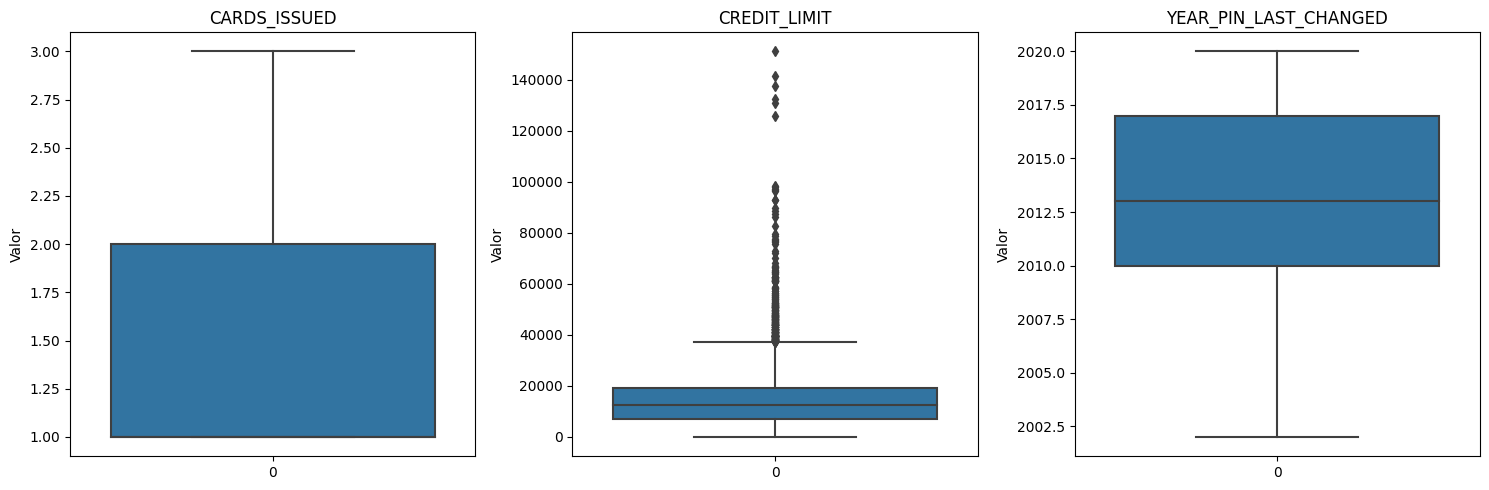

In [ ]:
# Configurar la visualización
num_variables = len(columnas_numericas)
num_filas = int(np.ceil(num_variables / 3))  # Ajusta el número de filas según tu preferencia

# Crear una subtrama para cada variable numérica
fig, axes = plt.subplots(num_filas, 3, figsize=(15, num_filas*5))
axes = axes.flatten()

# Iterar sobre las variables y trazar el gráfico de cajas y bigotes
for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=df_cards[columna], ax=axes[i])
    axes[i].set_title(columna)
    axes[i].set_ylabel('Valor')

# Ajustar el espaciado entre las subtramas y mostrar el gráfico
fig.tight_layout()
plt.show()

#### Datos de transacciones

In [ ]:
df_transactions.describe()

,ID_TRANSACTION,ID_USER,ID_CARD,YEAR,MONTH,DAY,AMOUNT
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,2.338690e+07,1.912780e+03,1.382052e+00,2.012103e+03,6.521596e+00,1.572999e+01,4.326853e+01
std,5.773504e+05,4.739428e+01,1.400335e+00,4.992197e+00,3.473163e+00,8.791852e+00,8.238353e+01
min,2.238690e+07,1.829000e+03,0.000000e+00,1.996000e+03,1.000000e+00,1.000000e+00,-5.000000e+02
25%,2.288690e+07,1.876000e+03,0.000000e+00,2.009000e+03,3.000000e+00,8.000000e+00,8.730000e+00
50%,2.338690e+07,1.911000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,3.197000e+01
75%,2.388690e+07,1.952000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,6.600000e+01
max,2.438690e+07,1.999000e+03,7.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,5.155360e+03


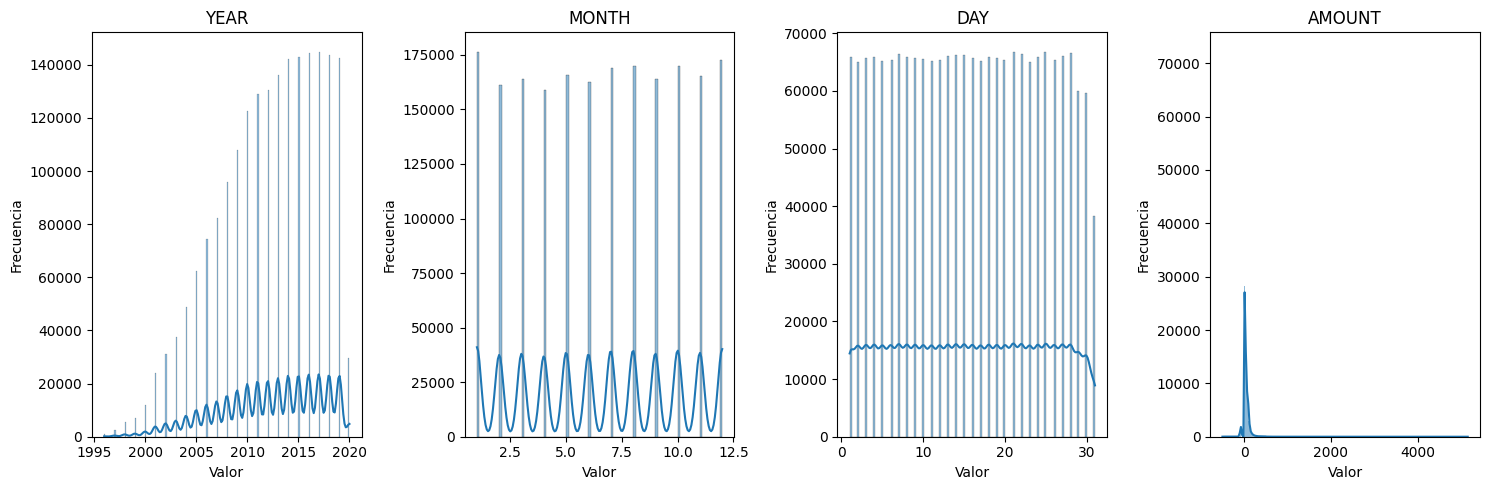

In [ ]:
columnas_numericas = df_transactions.select_dtypes(include=['number']).drop(columns=['ID_TRANSACTION', 'ID_USER', 'ID_CARD']).columns
num_variables = len(columnas_numericas)
num_filas = int(np.ceil(num_variables / 4))
fig, axes = plt.subplots(num_filas, 4, figsize=(15, num_filas*5))
axes = axes.flatten()

for i, columna in enumerate(columnas_numericas):
    sns.histplot(df_transactions[columna], ax=axes[i], kde=True)
    axes[i].set_title(columna)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

fig.tight_layout()
plt.show()


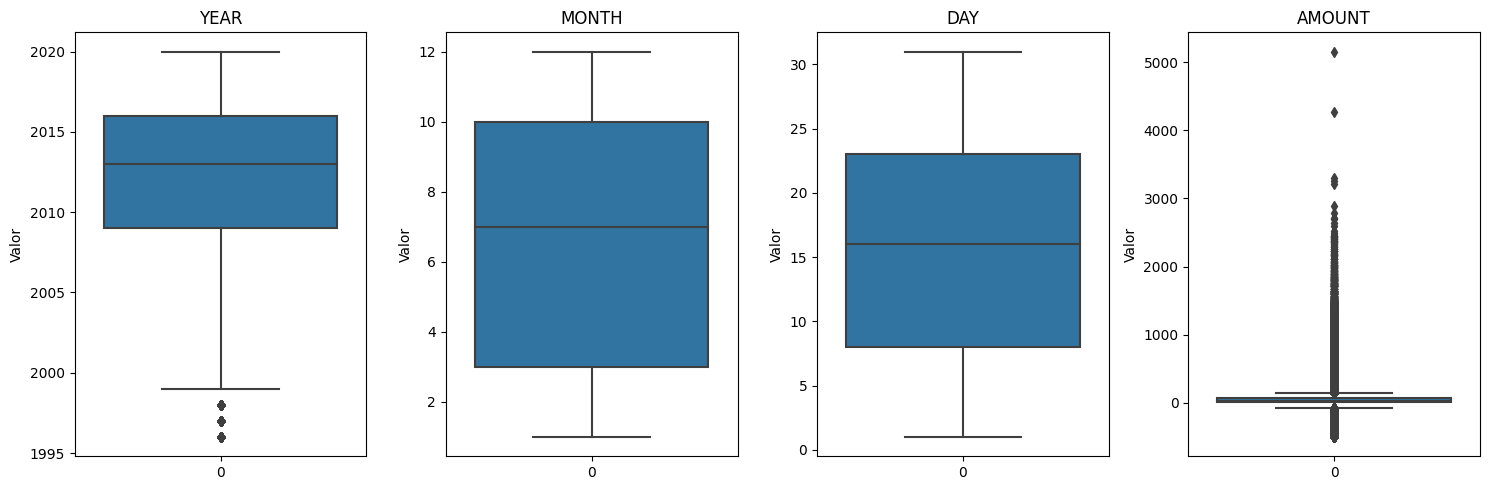

In [ ]:
# Configurar la visualización
num_variables = len(columnas_numericas)
num_filas = int(np.ceil(num_variables / 4))  # Ajusta el número de filas según tu preferencia

# Crear una subtrama para cada variable numérica
fig, axes = plt.subplots(num_filas, 4, figsize=(15, num_filas*5))
axes = axes.flatten()

# Iterar sobre las variables y trazar el gráfico de cajas y bigotes
for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=df_transactions[columna], ax=axes[i])
    axes[i].set_title(columna)
    axes[i].set_ylabel('Valor')

# Ajustar el espaciado entre las subtramas y mostrar el gráfico
fig.tight_layout()
plt.show()

# Comportamiento de los datos

Aquí se pueden generar diversos agrupamientos para la toma de decisiones

In [ ]:
# Comportamiento de montos transados ($) de cada cliente
data_grouping(df_complete, ["ID_USER"], ["AMOUNT"])["AMOUNT"].sort_values("sum")


## De acuerdo con el resultado, se pueden identificar los clientes que más dinero
## han transado, con lo cual se podrían dar incentivos para premiar su comportamiento
## y así intentar que este comportamiento se replique para otros clientes.

## Además, se podría también explorar más en detalle los que tienen alta transaccionalidad
## para mitigar los riesgos LAFT  

,count,sum,mean,std,min,<lambda_0>,median,<lambda_1>,max
ID_USER,,,,,,,,,
1914,73,1195.26,16.373425,51.927961,-99.00,0.790,9.680,15.344,99.00
1991,47,1433.77,30.505745,24.686167,-91.00,23.865,30.970,31.373,91.00
1970,79,1525.35,19.308228,49.685176,-80.00,0.610,1.520,1.779,226.11
1973,113,1639.24,14.506549,13.498599,-57.00,7.610,16.800,17.482,57.00
1928,77,1733.66,22.515065,8.071050,1.14,17.910,23.900,24.602,36.76
...,...,...,...,...,...,...,...,...,...
1893,33964,2113305.92,62.221939,67.085508,-498.00,34.570,43.590,47.660,1892.43
1918,57975,2262112.13,39.018752,86.640349,-500.00,11.840,57.000,63.050,3256.69
1974,37046,2510725.03,67.773175,57.534804,-491.00,19.840,59.035,69.630,1636.96


In [ ]:
# Comportamiento de montos transados ($) y edades de los usuarios con cada proveedor de tarjetas de pago
data_grouping(df_complete, ["CARD_BRAND"], ["AMOUNT", 'CURRENT_AGE'])

## De acuerdo con el resultado, con respecto a los montos transados, se encuentra que MasterCard es el
## proveedor donde más se hacen transacciones, sin embargo, su tiquet promedio es el más bajo de todos.
## Con base a la edad de los usuarios, se encuentra que Discover es el proveedor que cuenta con la población
## que transa más joven.

AMOUNT                                                       \
              count          sum       mean        std    min <lambda_0>   
CARD_BRAND                                                                 
Amex         162417   7522865.97  46.318218  91.759111 -500.0       7.92   
Discover      60288   3310421.01  54.910115  97.041357 -500.0      11.21   
Mastercard  1069057  43820366.27  40.989738  78.659286 -500.0       8.86   
Visa         708238  31883402.88  45.017922  84.080557 -500.0       8.53   

                                       CURRENT_AGE                       \
            median <lambda_1>      max       count       sum       mean   
CARD_BRAND                                                                
Amex        34.370    40.1100  2792.44      162417   8583816  52.850477   
Discover    44.715    52.1985  2460.02       60288   2873993  47.671062   
Mastercard  30.860    35.8700  5155.36     1069057  58315497  54.548539   
Visa        32.400    37.6300  3256.69      708238  38209568  53.950181   

                                                            
                  std min <lambda_0> median <lambda_1> max  
CARD_BRAND                                                  
Amex        13.505706  20       44.0   49.0       51.0  85  
Discover    17.002346  18       39.0   40.0       40.0  99  
Mastercard  15.764710  18       44.0   54.0       54.0  99  
Visa        15.860870  18       42.0   54.0       56.0  99

In [ ]:
# Comportamiento de montos transados ($) por cada proveedor de tarjetas de pago en cada ciudad
data_grouping(df_complete, ["CARD_TYPE", "MERCHANT_CITY"], ["AMOUNT"])

## Con base a los resultados, se podrían dirigir campañas para incentivar la utilización de 
## diferentes tipos de tarjetas, en diferentes ciudades. Además, se podría ver cómo se está 
## comportando transaccionalmente cada ciudad, con lo cual se podrían afianzar las alianzas
## para incentivar aún más las ciudades que más transan, y crear nuevas alianzas en ciudades
## que no tengan mucha transaccionalidad actualmente.

AMOUNT                                          \
                               count      sum       mean         std     min   
CARD_TYPE       MERCHANT_CITY                                                  
Credit          Abbeville         43  1936.68  45.039070   91.656659    1.70   
                Abbotsford         3   220.55  73.516667  192.974353 -145.00   
                Abbottstown       11   811.59  73.780909  125.893806 -210.00   
                Aberdeen          31   945.17  30.489355   62.539962  -91.00   
                Abilene           22   982.94  44.679091  190.700882 -434.00   
...                              ...      ...        ...         ...     ...   
Debit (Prepaid) Youngstown         1    48.22  48.220000         NaN   48.22   
                Yreka              2     9.54   4.770000    6.462956    0.20   
                Yukon              1    39.71  39.710000         NaN   39.71   
                Zion               2    80.00  40.000000    0.000000   40.00   
                Zurich             6    46.90   7.816667    7.989878    2.19   

                                                                     
                              <lambda_0>  median <lambda_1>     max  
CARD_TYPE       MERCHANT_CITY                                        
Credit          Abbeville         3.0550    8.43    17.6640  443.68  
                Abbotsford        0.0000  145.00   152.5550  220.55  
                Abbottstown      31.5500   76.56    85.2300  281.69  
                Aberdeen          3.5050    8.67    10.6450  225.66  
                Abilene           2.3225   39.85    47.3315  434.00  
...                                  ...     ...        ...     ...  
Debit (Prepaid) Youngstown       48.2200   48.22    48.2200   48.22  
                Yreka             2.4850    4.77     5.2270    9.34  
                Yukon            39.7100   39.71    39.7100   39.71  
                Zion             40.0000   40.00    40.0000   40.00  
                Zurich            2.7275    3.76     3.9650   22.08  

[12826 rows x 9 columns]